<a href="https://colab.research.google.com/github/sabaakram539/Bank_Loan_Modelling/blob/main/Bank_Loan_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About the dataset
The case is about a bank "Thera Bank" which has growing customer base. Majority of thesecustomers are liability customers (depositors) with varying size of deposits. The number of customers who are also boorrowers (asset customers) is quite small, and the bank is innterested in expanding its base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting it liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate over 9% success. This has encauraged the retail marketing department to device campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to buils a model that will help them identify the potential customers who have a higher probablity of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

In [136]:
import pandas as pd

In [137]:
dataset=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)

In [138]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Preprocessing

In [139]:
dataset.shape

(5000, 14)

In [140]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [142]:
# Checking for null
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No null values.

In [143]:
# Removing duplicates if any.
dataset=dataset.drop_duplicates()

In [144]:
# Removing unimportant columns
dataset.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [145]:
dataset.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0


In [146]:
dataset.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [147]:
dataset.Family.unique()

array([4, 3, 1, 2])

In [148]:
dataset.Education.unique()

array([1, 2, 3])

In [149]:
dataset['Personal Loan'].unique()

array([0, 1])

In [150]:
dataset['Securities Account'].unique()

array([1, 0])

In [151]:
dataset['CD Account'].unique()

array([0, 1])

In [152]:
dataset['Online'].unique()

array([0, 1])

In [153]:
dataset['CreditCard'].unique()

array([0, 1])

*   Continuous variables are Age, Experience, Income, Family, CCAvg, Mortgage.
*   Categorical variables are Education, Personal Loan, Securities Account, CD Account, Online and CredidCard.



In [154]:
dataset[['Age','Experience','Income','Family','CCAvg','Mortgage']].mean()

Age           45.338400
Experience    20.104600
Income        73.774200
Family         2.396400
CCAvg          1.937913
Mortgage      56.498800
dtype: float64

In [155]:
bankloan_yes[['Age','Experience','Income','Family','CCAvg','Mortgage']].describe()

,Age,Experience,Income,Family,CCAvg,Mortgage
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,45.066667,19.843750,144.745833,2.612500,3.905347,100.845833
std,11.590964,11.582443,31.584429,1.115393,2.097679,160.847862
min,26.000000,0.000000,60.000000,1.000000,0.000000,0.000000
25%,35.000000,9.000000,122.000000,2.000000,2.600000,0.000000
50%,45.000000,20.000000,142.500000,3.000000,3.800000,0.000000
75%,55.000000,30.000000,172.000000,4.000000,5.350000,192.500000
max,65.000000,41.000000,203.000000,4.000000,10.000000,617.000000


In [156]:
bankloan_no[['Age','Experience','Income','Family','CCAvg','Mortgage']].describe()

,Age,Experience,Income,Family,CCAvg,Mortgage
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000
mean,45.367257,20.132301,66.237389,2.373451,1.728982,51.789381
std,11.450427,11.456672,40.578534,1.148771,1.567654,92.038931
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000
25%,35.000000,10.000000,35.000000,1.000000,0.600000,0.000000
50%,45.000000,20.000000,59.000000,2.000000,1.400000,0.000000
75%,55.000000,30.000000,84.000000,3.000000,2.300000,98.000000
max,67.000000,43.000000,224.000000,4.000000,8.800000,635.000000


## Exploration and Visualization

In [157]:
import matplotlib.pyplot as plt

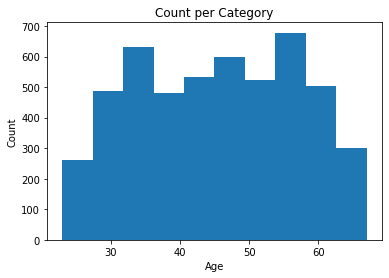

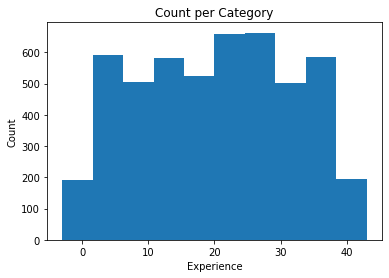

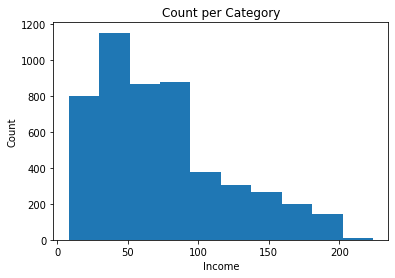

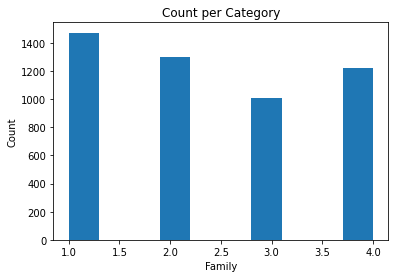

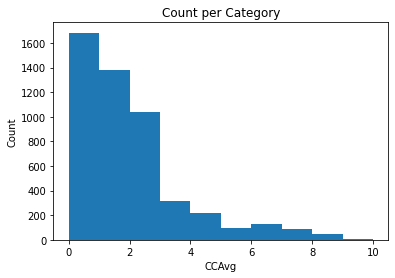

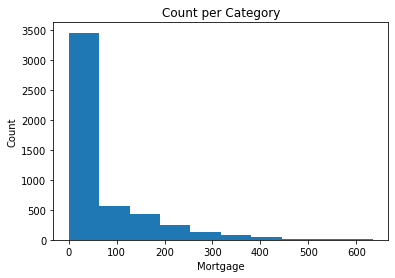

In [158]:
for i, predictor in enumerate(dataset[['Age','Experience','Income','Family','CCAvg','Mortgage']]):
  plt.figure(i)
  plt.xlabel(predictor)
  plt.ylabel("Count")
  plt.title("Count per Category")
  plt.hist(dataset[predictor])

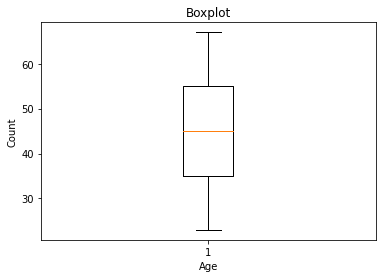

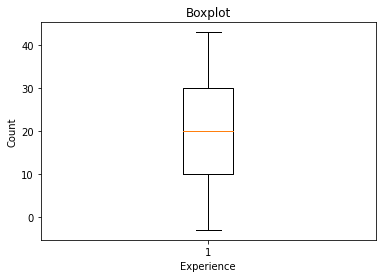

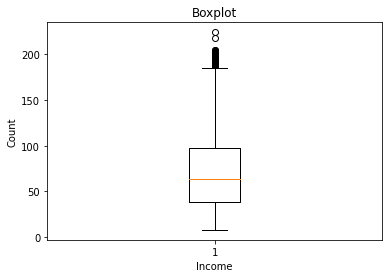

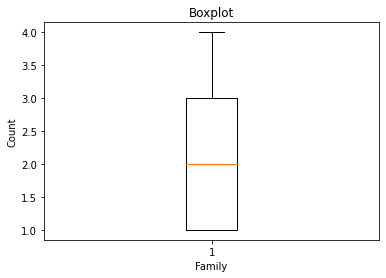

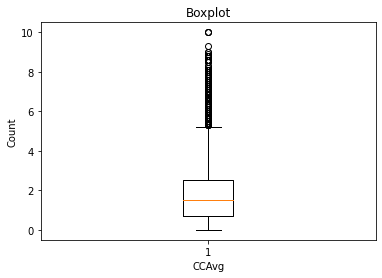

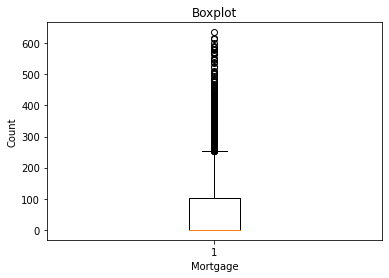

In [159]:
for i, predictor in enumerate(dataset[['Age','Experience','Income','Family','CCAvg','Mortgage']]):
  plt.figure(i)
  plt.xlabel(predictor)
  plt.ylabel("Count")
  plt.title("Boxplot")
  plt.boxplot(dataset[predictor])

In [160]:
dataset.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [161]:
import seaborn as sns

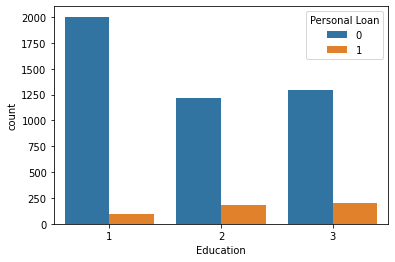

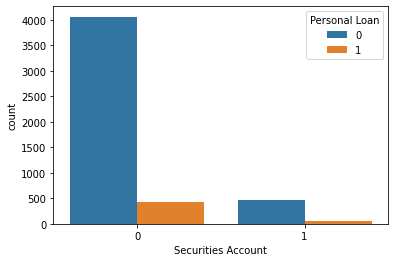

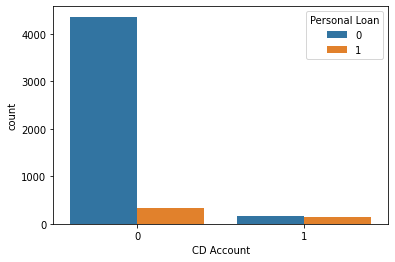

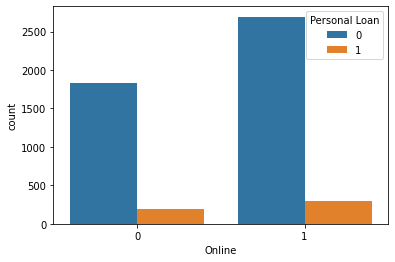

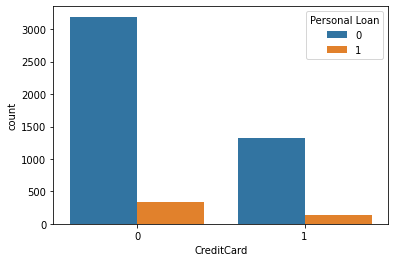

In [162]:
for i, predictor in enumerate(dataset[['Education', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]):
  plt.figure(i)
  sns.countplot(data=dataset,x=predictor,hue="Personal Loan")

By observing the above variables, we get that 


*   Normal Distribution :- Age, Experience and Income.
*   Not-Normal Distribution :- Mortgage and CCAvg.
*   Categorical Distribution :-  Education, Family, Securities Account, CD Account, Online and CreditCards.



In [163]:
bankloan_yes=dataset[dataset['Personal Loan']==1]
bankloan_no=dataset[dataset['Personal Loan']==0]

We will perform ttest ind for normally distributed variable, manwhitney test for not-normal distribution and chi_square test for categorical distribution.

ttest independent

In [164]:
from scipy.stats import ttest_ind

* H0=There is no signiificant difference in the sanction of loan with respect to Average Age.
* HA= There is signiificant difference in the sanction of loan with respect to Average Age.

In [165]:
stats,p=ttest_ind(bankloan_yes.Age,bankloan_no.Age)
print(stats,p)

-0.5461906615539323 0.584959263705325


P Value is greater than 0.05. Therefore H0 is accepted.
There is no significannt difference between the sanction of loans with respect to Average Age.

* H0=There is no signiificant difference in the sanction of loan with respect to Average Experience.
* HA= There is signiificant difference in the sanction of loan with respect to Average Experience.

In [166]:
stats,p=ttest_ind(bankloan_yes.Experience,bankloan_no.Experience)
print(stats,p)

-0.5240947451995412 0.600235883164189


P Value is greater than 0.05. Therefore H0 is accepted.
There is no significannt difference between the sanction of loans with respect to Average Experience.

* H0=There is no signiificant difference in the sanction of loan with respect to Average Income.
* HA= There is signiificant difference in the sanction of loan with respect to Average Income.

In [167]:
stats,p=ttest_ind(bankloan_yes.Income,bankloan_no.Income)
print(stats,p)

41.08533291207552 0.0


P Value is less than 0.05. Therefore H0 is rejected.
There is significannt difference between the sanction of loans with respect to Average Income.

mannwhitney test

In [168]:
from scipy.stats import mannwhitneyu

* H0=There is no signiificant difference in the sanction of loan with respect to Mortgage.
* HA= There is signiificant difference in the sanction of loan with respect to Mortgage.

In [169]:
stats,p=mannwhitneyu(bankloan_yes.Mortgage,bankloan_no.Mortgage)
print(stats,p)

974814.5 3.819046433025639e-06


P Value is less than 0.05. Therefore H0 is rejected.
There is significannt difference between the sanction of loans with respect to Moortgage.

* H0=There is no signiificant difference in the sanction of loan with respect to CCAvg.
* HA= There is signiificant difference in the sanction of loan with respect to CCAvg.

In [170]:
stats,p=mannwhitneyu(bankloan_yes.CCAvg,bankloan_no.CCAvg)
print(stats,p)

417591.0 1.7997250113260796e-109


P Value is less than 0.05. Therefore H0 is rejected.
There is significannt difference between the sanction of loans with respect to CCAvg.

Chi Square Test

In [171]:
from scipy.stats import chi2_contingency

* H0=There is no signiificant dependency in the sanction of loan with respect to Education.
* HA= There is signiificant dependency in the sanction of loan with respect to Education.

In [172]:
chitable=pd.crosstab(dataset['Personal Loan'],dataset['Education'])
chitable

Education,1,2,3
Personal Loan,,,
0,2003,1221,1296
1,93,182,205


In [173]:
stats,p,dof,expexted=chi2_contingency(chitable)
print(stats,p)

111.2398718738913 6.991473868665428e-25


P Value is less than 0.05. Therefore H0 is rejected.
There is significannt dependency between the sanction of loans with respect to Education.

* H0=There is no signiificant dependency in the sanction of loan with respect to Family.
* HA= There is signiificant dependency in the sanction of loan with respect to Family.

In [174]:
chitable=pd.crosstab(dataset['Personal Loan'],dataset['Family'])
chitable

Family,1,2,3,4
Personal Loan,,,,
0,1365,1190,877,1088
1,107,106,133,134


In [175]:
stats,p,dof,expexted=chi2_contingency(chitable)
print(stats,p)

29.676116414854746 1.6144121228248757e-06


P Value is less than 0.05. Therefore H0 is rejected. There is significannt dependency between the sanction of loans with respect to Family.

* H0=There is no signiificant dependency in the sanction of loan with respect to Securities Account.
* HA= There is signiificant dependency in the sanction of loan with respect to Securities Account.

In [176]:
chitable=pd.crosstab(dataset['Personal Loan'],dataset['Securities Account'])
chitable

Securities Account,0,1
Personal Loan,,
0,4058,462
1,420,60


In [177]:
stats,p,dof,expexted=chi2_contingency(chitable)
print(stats,p)

2.172310545186504 0.14051497326319357


P Value is less than 0.05. Therefore H0 is rejected. There is significannt dependency between the sanction of loans with respect to Securities Account.

* H0=There is no signiificant dependency in the sanction of loan with respect to CD Account.
* HA= There is signiificant dependency in the sanction of loan with respect to CD Account.

In [178]:
chitable=pd.crosstab(dataset['Personal Loan'],dataset['CD Account'])
chitable

CD Account,0,1
Personal Loan,,
0,4358,162
1,340,140


In [179]:
stats,p,dof,expexted=chi2_contingency(chitable)
print(stats,p)

495.90424218782334 7.398297503329848e-110


P Value is less than 0.05. Therefore H0 is rejected. There is significannt dependency between the sanction of loans with respect to CD Account.

* H0=There is no signiificant dependency in the sanction of loan with respect to Online.
* HA= There is signiificant dependency in the sanction of loan with respect to Onnline.

In [180]:
chitable=pd.crosstab(dataset['Personal Loan'],dataset['Online'])
chitable

Online,0,1
Personal Loan,,
0,1827,2693
1,189,291


In [181]:
stats,p,dof,expexted=chi2_contingency(chitable)
print(stats,p)

0.1560067212052492 0.6928599643141485


P Value is greater than 0.05. Therefore H0 is accepted. There is no significannt dependency between the sanction of loans with respect to Online.

* H0=There is no signiificant dependency in the sanction of loan with respect to CreditCard.
* HA= There is signiificant dependency in the sanction of loan with respect to CreditCard.

In [182]:
chitable=pd.crosstab(dataset['Personal Loan'],dataset['CreditCard'])
chitable

CreditCard,0,1
Personal Loan,,
0,3193,1327
1,337,143


In [184]:
stats,p,dof,expexted=chi2_contingency(chitable)
print(stats,p)

0.021144453920855056 0.8843861223314504


P Value is greater than 0.05. Therefore H0 is accepted. There is no significannt dependency between the sanction of loans with respect to CreditCard.

## Analysing Correlation

In [185]:
from scipy.stats import pearsonr

In [186]:
stats,p=pearsonr(dataset['Personal Loan'],dataset['Age'])
print(stats,p)

-0.007725617173534038 0.5849592637162507


There is no significant correlation between the sanction of loan and Age.

In [187]:
stats,p=pearsonr(dataset['Personal Loan'],dataset['Experience'])
print(stats,p)

-0.0074130980767702385 0.6002358831756374


There is no significant correlation between the sanction of loan and Experience.

In [188]:
stats,p=pearsonr(dataset['Personal Loan'],dataset['Income'])
print(stats,p)

0.5024622924949341 3.560286e-318


There is significant correlation between the sanction of loan and Income.

In [189]:
stats,p=pearsonr(dataset['Personal Loan'],dataset['Mortgage'])
print(stats,p)

0.14209523632788262 5.7303417216823745e-24


There is significant correlation between the sanction of loan and Mortgage.

In [190]:
stats,p=pearsonr(dataset['Personal Loan'],dataset['CCAvg'])
print(stats,p)

0.36689053339797734 3.815683642017435e-159


There is significant correlation between the sanction of loan and CCAvg.

In [191]:
stats,p=pearsonr(dataset['Personal Loan'],dataset['Education'])
print(stats,p)

0.1367215500302807 2.70966319362686e-22


There is significant correlation between the sanction of loan and Education.

In [192]:
stats,p=pearsonr(dataset['Personal Loan'],dataset['Family'])
print(stats,p)

0.06136704401190937 1.4099040685936267e-05


There is significant correlation between the sanction of loan and Family.

In [193]:
stats,p=pearsonr(dataset['Personal Loan'],dataset["Securities Account"])
print(stats,p)

0.02195388221631122 0.12062087855790704


There is significant correlation between the sanction of loan and Securities Account.

In [194]:
stats,p=pearsonr(dataset['Personal Loan'],dataset['CD Account'])
print(stats,p)

0.31635482941440135 1.2784028484762053e-116


There is significant correlation between the sanction of loan and CD Account.

In [195]:
stats,p=pearsonr(dataset['Personal Loan'],dataset['Online'])
print(stats,p)

0.006277815396758705 0.6571857663997954


There is no significant correlation between the sanction of loan and Online.

In [197]:
stats,p=pearsonr(dataset['Personal Loan'],dataset['CreditCard'])
print(stats,p)

0.002801508841555881 0.8430079402158692


There is no significant correlation between the sanction of loan and CreditCard.

## Applying the Model

In [198]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [202]:
y=dataset['Personal Loan']
x=dataset.drop(['Personal Loan'],axis=1)
x1=sm.add_constant(x)

In [203]:
logistic=sm.Logit(y,x1)
result=logistic.fit()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


In [204]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Sat, 28 Aug 2021   Pseudo R-squ.:                  0.5938
Time:                        06:51:01   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""